In [40]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

# Load data

In [2]:
df = pd.read_csv('Health_AnimalBites.csv')

In [3]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [5]:
df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

# Features of Animal Bite Data

- bite_date: The date the bite occurred
- SpeciesIDDesc: The species of animal that did the biting
- BreedIDDesc: Breed (if known)
- GenderIDDesc: Gender (of the animal)
- color: color of the animal
- vaccination_yrs: how many years had passed since the last vaccination
- vaccination_date: the date of the last vaccination
- victim_zip: the zipcode of the victim
- AdvIssuedYNDesc: whether advice was issued
- WhereBittenIDDesc: Where on the body the victim was bitten
- quarantine_date: whether the animal was quarantined
- DispositionIDDesc: whether the animal was released from quarantine
- head_sent_date: the date the animal’s head was sent to the lab
- release_date: the date the animal was released
- ResultsIDDesc: results from lab tests (for rabies)

In [7]:
# There are 9 animals name 
species = df.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


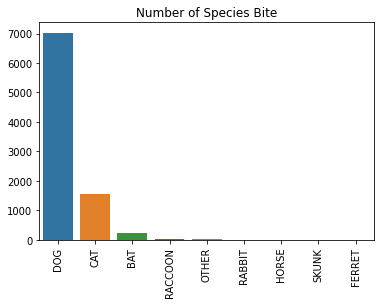

In [8]:
animal_list = []
for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)

# Monthly distribution of animal bites

In [32]:
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc']==animal)&(data['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal,palette  = "Blues")
    plt.title(animal + ' bite for 12 month')
    plt.xlabel('Month')
    plt.ylabel('No. of bites')

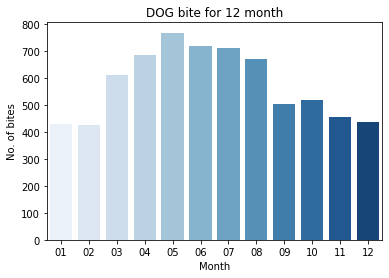

In [33]:
# Dogs mostly bites at 5th month
animal_month('DOG',df)

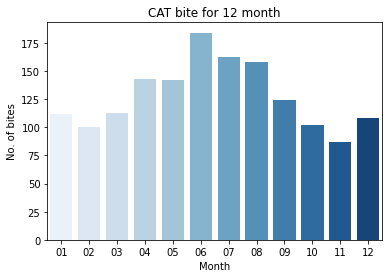

In [34]:
# Cats mostly bite at 6th month
animal_month('CAT',df)

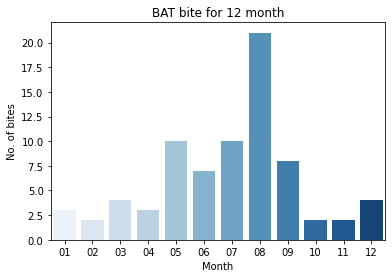

In [35]:
# Bats mostly bite at 8th month
animal_month('BAT',df)

# Find out most agressive breed

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


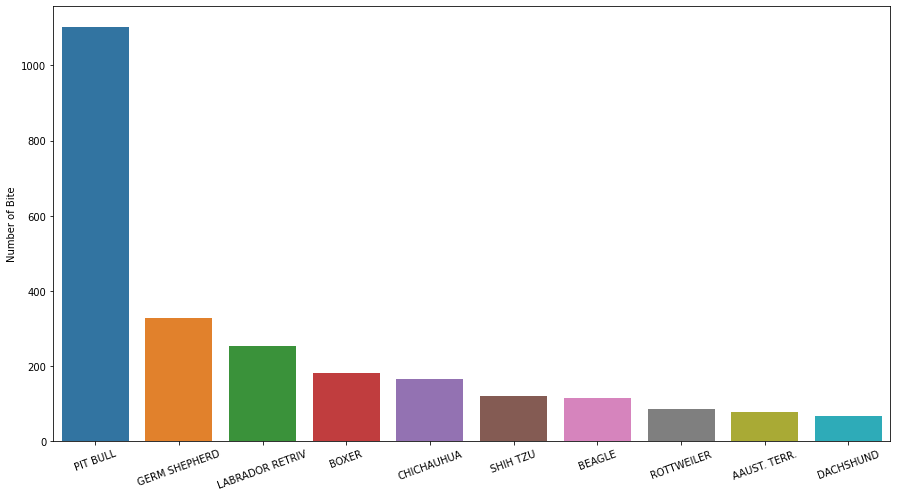

In [37]:
count = df.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")

print(count[0:10].index)

# Where animal bites

In [38]:
def bite_place(animal,data):
    bitePlaces = data.WhereBittenIDDesc.unique()
    #print(bitePlaces)
    head = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='HEAD')]
    body = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='BODY')]
    numberOfHead = len(head)
    numberOfBody = len(body)
    total = numberOfHead+numberOfBody
    fig1=plt.figure()
    ax1=fig1.add_subplot(111,aspect='equal')
    ax1.add_patch(
        patches.Rectangle((0.3,0.1),0.4,0.5,alpha=numberOfBody/float(total),color='r')
    )
    circle = plt.Circle((0.5,0.7),0.1,color='r',alpha=numberOfHead/float(total))
    ax1.add_artist(circle)
    plt.text(0.45,0.7,round(numberOfHead/float(total),2))
    plt.text(0.45,0.4,round(numberOfBody/float(total),2))
    plt.title(str(animal)+' Bite Probability of Head and Body')
    plt.axis('off')

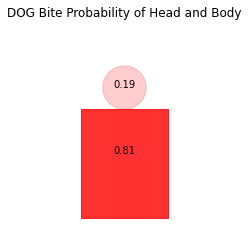

In [41]:
#Dog bites 19% head and 81% body
bite_place('DOG',df)

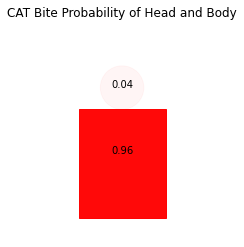

In [42]:
#Cat bites 4% head and 96% body
bite_place('CAT',df)

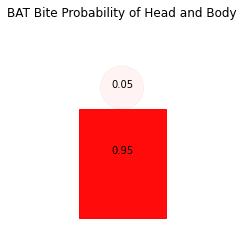

In [43]:
#Bat bites 5% head and 95% body
bite_place('BAT',df)

# More dangerous among male and female

MALE      3832
FEMALE    2016
Name: GenderIDDesc, dtype: int64


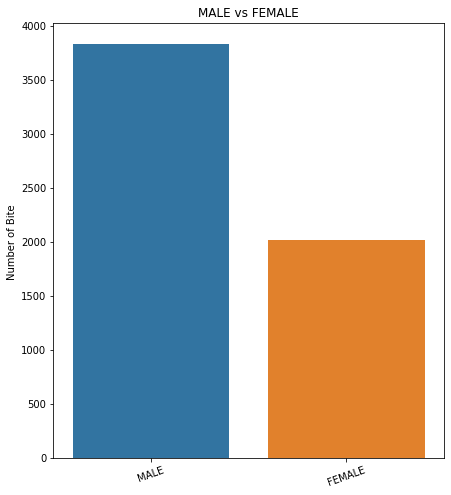

In [45]:
gender = ['MALE','FEMALE']
count_gender = df.GenderIDDesc.value_counts()
plt.figure(figsize= (7,8))
x = sns.barplot(x=gender, y= count_gender[0:2])
plt.ylabel('Number of Bite ')
plt.xticks(rotation = 20)
plt.title('MALE vs FEMALE')
print(count_gender[0:2])

# Probability of Being Rabid

In [46]:
def rabid_prob(animal,data):
    labels = ['POSITIVE','NEGATIVE']
    colors = ['red','green']
    explode = [0.1,0]
    p = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='POSITIVE')]
    n = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='NEGATIVE')]
    sizes = [len(p),len(n)]
    print(sizes)
    if len(p)==0:
        labels = ['','NEGATIVE']
    plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct ='%1.1f&&')
    plt.axis('equal')
    plt.title(animal + ' Rabid Probability')
    plt.show()

[1, 58]


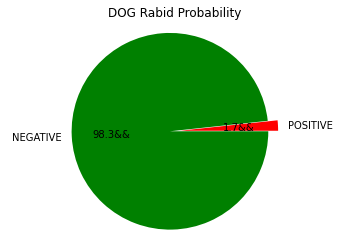

In [47]:
# Dog rabid probability is 1.7%
rabid_prob('DOG',df)

[3, 160]


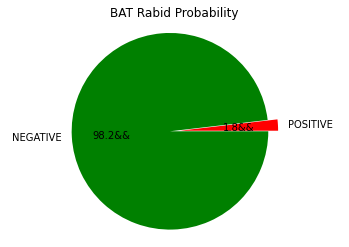

In [48]:
# Bat rabid probability is 1.8%
rabid_prob('BAT',df)